In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [20]:
data_path = "C:/Users/ngomi/Desktop/original_result.txt"
data = np.loadtxt(data_path)

In [21]:
percentage_of_zero = []
for i in data:
    # n_zero = len(data[i]) - np.count_nonzero(data[i])
    n_zero = len(np.where(i == 0)[0])
    percentage_of_zero.append(n_zero/(1.0*len(i)))
    

In [29]:
print(percentage_of_zero)

[0.5765158440779736, 0.5651613965674859, 0.6866400505017449, 0.6326124730020458, 0.703156570188347, 0.5661515854634358, 0.5729224506858484, 0.6798839642180781, 0.5738471899959252, 0.6327539285586101, 0.5291535679525047, 0.5895107537892144, 0.5119656621914632, 0.49039263417692924, 0.6340988119844525, 0.5157849622186987, 0.6069984608790935, 0.6754819517488763, 0.746243510462433, 0.7003696845963344, 0.5815807975137602, 0.519659155446989, 0.6413531596315399, 0.5855204403279235, 0.640709220157628, 0.6641887312703343, 0.5002354073814466, 0.6208505490375744, 0.5711933148526223, 0.6375275257734135, 0.6422736763876896, 0.6103511686973633, 0.5948670634459841, 0.5182445998813462, 0.6251026608423573, 0.581540683251451, 0.6791872428200749, 0.6227126953195101, 0.5681826339024633, 0.669806839270596, 0.5935095123583597, 0.6113645816399133, 0.5872685776538223, 0.6139086703811066, 0.6397507004161327, 0.6507863451051099, 0.5230583113584589, 0.6658144145323416, 0.6989804643542554, 0.6340713653839252, 0.66

Text(0, 0.5, '')

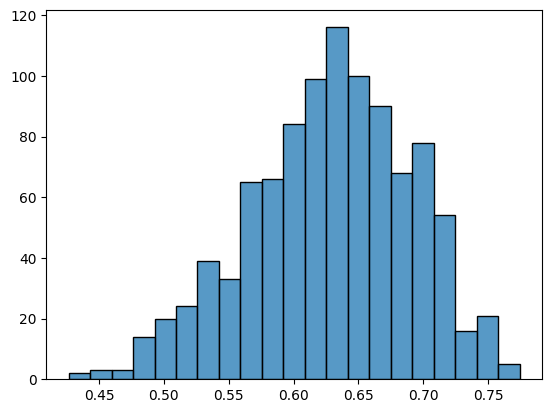

In [22]:
hist = sb.histplot(percentage_of_zero)
hist.set_ylabel("")

In [1]:
import os, json
from os.path import join
result_dir = '../result'
files = os.listdir(result_dir)
def read_prop(prop_name):
    result = []
    for file in files:
        with open(join(result_dir, file)) as f:
            data = json.load(f)
            result.append(data[prop_name])
    return result

In [10]:
original_runtime = read_prop("original_runing_time")
eu_runtime = read_prop("euclidean_running_time")
cos_runtime = read_prop("cosine_running_time")

In [23]:
original_mimic_score = read_prop("original_mimic_score")
euclidean_mimic_score = read_prop("euclidean_mimic_score")
cosine_mimic_score = read_prop("cosine_mimic_score")

In [26]:
original_mimic_score = [np.mean(i) for i in original_mimic_score]
euclidean_mimic_score = [np.mean(i) for i in euclidean_mimic_score]
cosine_mimic_score = [np.mean(i) for i in cosine_mimic_score]

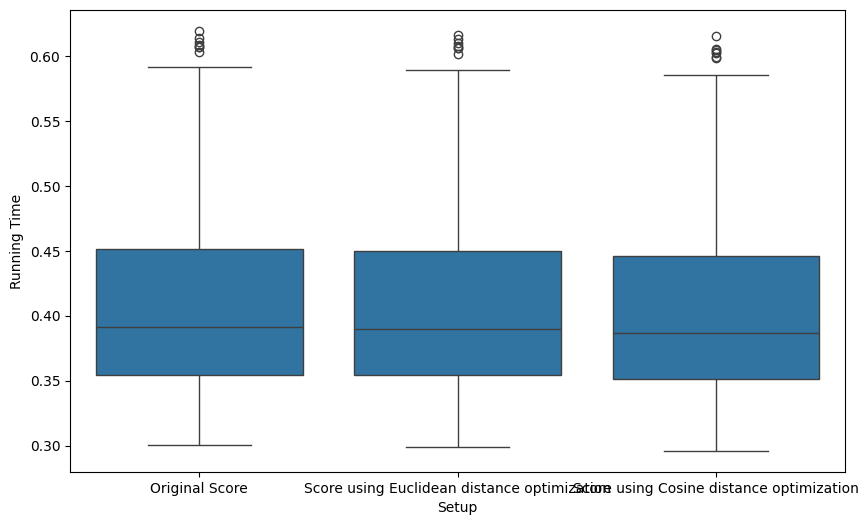

In [48]:
data = pd.DataFrame({'Original Method': original_mimic_score, 'Score using Euclidean distance optimization': euclidean_mimic_score, 'Score using Cosine distance optimization': cosine_mimic_score})
data_melted = data.melt(var_name='Setup', value_name='ConnectivityScore')

plt.figure(figsize=(10, 6))
sb.boxplot(x='Setup', y='ConnectivityScore', data=data_melted)
plt.ylabel('Running Time')
plt.show()

Text(0, 0.5, '')

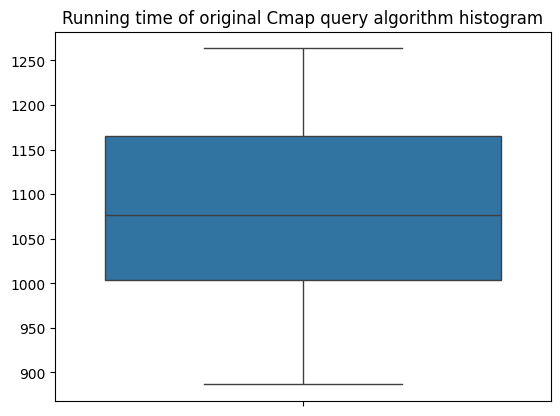

In [8]:
hist = sb.boxplot(original_runtime)
hist.set_title("Running time of original Cmap query algorithm histogram")
hist.set_ylabel("")

In [16]:
data = pd.DataFrame({'Original Algorithm': original_runtime, 'Optimized using Euclidean distance': eu_runtime, 'Optimized using Cosine distance': cos_runtime})
data_melted = data.melt(var_name='Setup', value_name='Running Time (s)')

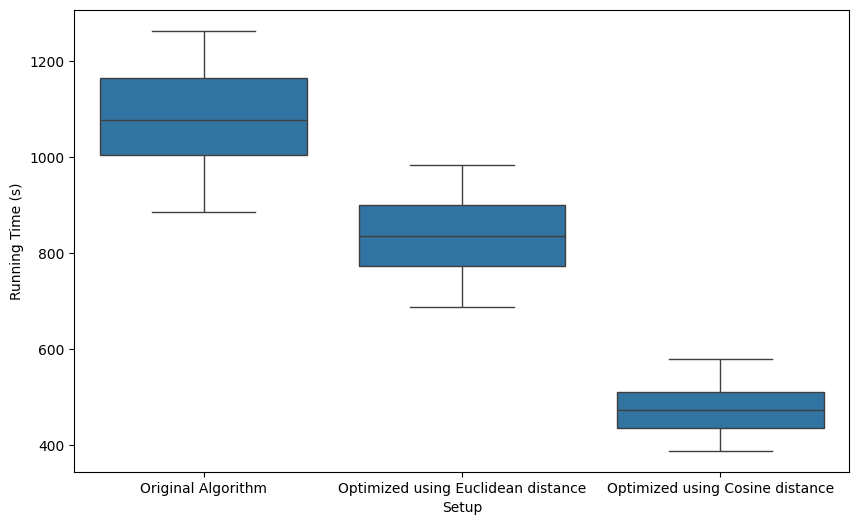

In [19]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='Setup', y='Running Time (s)', data=data_melted)
plt.xlabel('Setup')
plt.ylabel('Running Time (s)')
plt.show()

In [19]:
import numpy as np
from joblib import Parallel, delayed
from cmapPy.pandasGEXpress.parse import parse

data_path = "C:/Users/ngomi/Downloads/Documents/data.gctx"

data = parse(data_path).data_df
data = data.astype('float32').to_numpy().transpose()
tmp_dicectory = "../tmp"
n_rows = len(data)
def pairwise_manhattan_distance(A, B):
    return np.sum(np.abs(A[:, np.newaxis] - B), axis=2)



In [23]:
print(data.shape)

(34171, 12328)


In [24]:
def calculate_and_save_distances(i):
    start_row = i * 100
    end_row = min((i+1)*100, n_rows)
    subset_data = data[start_row: end_row]
    distances = pairwise_manhattan_distance(subset_data, data)
    # top_indices = np.argsort(distances, axis=1)[:, 1:51]
    # np.savetxt(f"{tmp_dicectory}/nearest_neighbor_{i}.txt", top_indices, fmt='%d')
    
Parallel(n_jobs=-1)(
    delayed(calculate_and_save_distances)(i) for i in range(n_rows//100 + 1)
)

MemoryError: Unable to allocate 157. GiB for an array with shape (100, 34171, 12328) and data type float32